# TP 1 de Statistique descriptive avec SAS

Objectifs de la séance :
* Rappeler le fonctionnement général des procédures et de l'étape DATA;
* Réaliser une analyse univariée sur des variables qualitatives à l'aide de SAS (procédures UNIVARIATE et MEANS);
* Réaliser des graphiques (boîte à moustache, histogramme, courbe de Lorentz, droite d'Henry) en SAS.

Le matériel nécessaire à la réalisation de ce TP est disponible sous Moodle. Créer sous votre espace personnel un dossier "TP1" contenant l'aborescence suivante  :

Les exercices portent sur une table : RP12_D35 (données issues de l'enquête du recensemement de la population). Vous trouverez un dictionnaire des variables à la fin du sujet.

**Attention : l'exploitation de données issues d'enquêtes nécessite l'utilisation de pondérations. En effet, lors d'une enquête, seul un échantillon de la population est interrogé. Ainsi pour obtenir des informations sur la population totale, on utilisera des indicateurs pondérés (moyenne pondéré par exemple)**

## Exercice 1

**Question 1** : Créez une bibliothèque (ou library) *source* faisant le lien avec le dossier TP1/Source. Vous prendrez soin d'utiliser une option d'instruction permettant la lecture seule. Est-ce ici nécessaire de renseigner un moteur ?

Créez également une bibliothèque *resultat* qui va contenir les tables en résultat de ce TP.

Rappel : une bibliothèque est un lien logique entre un dossier de votre ordinateur et un nom SAS. 

In [ ]:
LIBNAME source "/folders/myfolders/Donnees_TP_SAS/TP1" ACCESS = READONLY;
LIBNAME resultat "/folders/myfolders/Donnees_TP_SAS/TP1";

**Question 1** : créez une copie de la table RP12_d35 dans la bibliothèque *resultat*.

In [ ]:
DATA resultat.RP12_d35;
SET source.RP12_d35;
RUN;

**Question 2** : En utilisant une procédure, affichez les vingts premières lignes de la table.

In [ ]:
PROC PRINT DATA = source.RP12_d35(OBS = 20);
RUN;

**Question 2** : À l'aide d'une procédure judicieusement choisie, affichez des informations générales sur la table RP12 ainsi que sur les variables. Combien de variables et d'observations contient cette table ? Combien de variables numériques sont disponibles dans cette table ?

In [ ]:
PROC CONTENTS DATA = source.RP12_d35;
RUN;

**Question 3** : Quel est l'âge médian en Ille-et-Vilaine ? Celui des femmes et celui des hommes ? Veillez à ne pas afficher le nombre d'observations par sexe dans vos sorties.

In [ ]:
PROC MEANS DATA = source.RP12_d35 MEDIAN;
VAR AGE;
WEIGHT IPONDI;
RUN;

In [ ]:
PROC MEANS DATA = source.RP12_d35 MEDIAN NOOBS;
VAR AGE;
WEIGHT IPONDI;
CLASS SEXE;
RUN;

Il est également possible de répondre à cette question en utilisant la procédure UNIVARIATE. Les sorties de cette procédure sont plus riches que celles de la procédure MEANS. 

In [ ]:
PROC UNIVARIATE DATA = source.RP12_d35; 
VAR AGE;
WEIGHT IPONDI;
CLASS SEXE;
RUN;

**Question 4** : Calculez les déciles d'âge par sexe ainsi que le rapport interdécile. Stockez-les dans une table SAS

**Question 5** : Calculez à l'aide d'une procédure des indicateurs statistiques (moyenne, médiane, minimum, maximum, mode) sur l'âge en Ille-et-Vilaine et stockez-les dans une seule table.

In [ ]:
PROC UNIVARIATE DATA = source.RP12_d35;
VAR AGE;
WEIGHT IPONDI;
OUTPUT OUT = age_descriptive;
RUN;

**Question 6** : Faites deux représentations graphiques de la distribution de l'âge (histogramme et boîte à moustache) et repérez à vue de nez sur le graphique les indicateurs de tendance centrale. On pourra utiliser la procédure SGPLOT.

Remarque : il est possible d'obtenir un histogramme avec la procédure UNIVARIATE à l'aide de l'instruction HISTOGRAM mais les poids ne seront pas pris en compte.


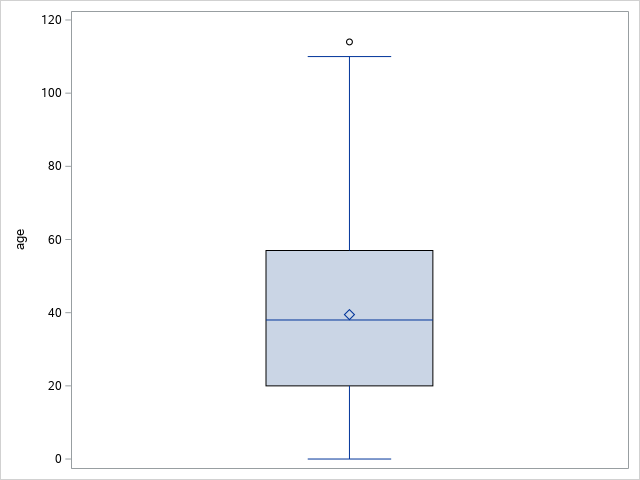

In [48]:
PROC SGPLOT data=SOURCE.RP12_D35;
    vbox age / WEIGHT = IPONDI;
RUN;


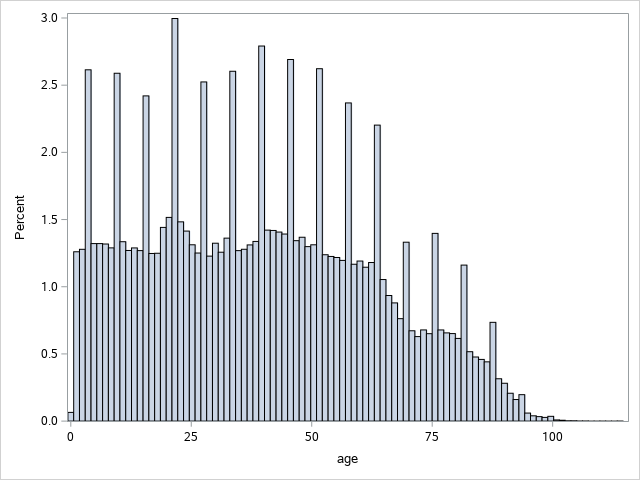

In [30]:
PROC SGPLOT DATA = source.RP12_d35;
HISTOGRAM AGE / WEIGHT = IPONDI;
RUN;

In [ ]:
PROC UNIVARIATE DATA = source.RP12_d35;
VAR AGE;
HISTOGRAM/ endpoids = 1 2;
RUN;

**Question** : En utilisant une seule procédure SGPLOT, comparez à l'aide d'une boîte à moustache l'âge des femmes et l'âge des hommes.


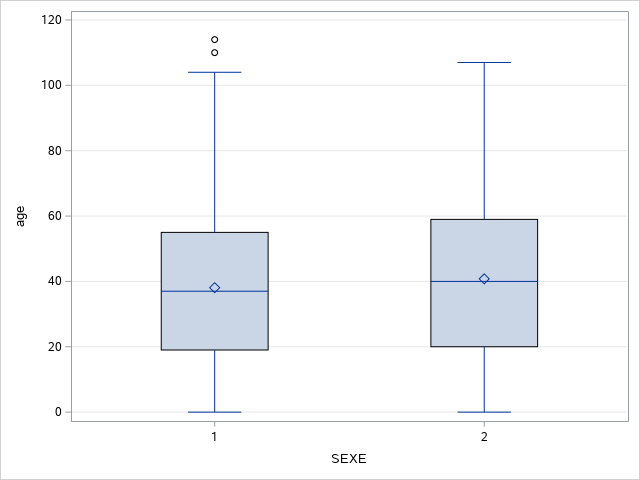

In [55]:
PROC SGPLOT DATA = SOURCE.RP12_D35;
     VBOX age / CATEGORY=SEXE WEIGHT=IPONDI;
     YAXIS grid;
RUN;


**Question 7** : On aimerait vérifier de manière graphique si l'âge est distribuée selon une loi gaussienne. Proposez un graphique permettant cette comparaison et réalisez-le.


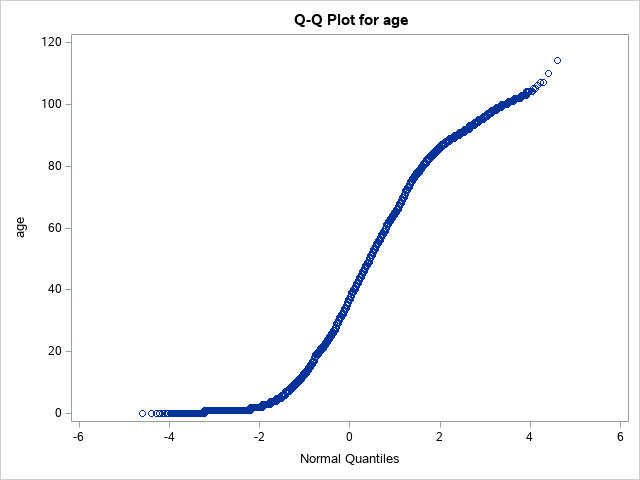

In [56]:
PROC UNIVARIATE DATA = source.RP12_d35 NOPRINT;
QQPLOT AGE;
RUN;

**Question 8** : À l'aide d'une étape DATA, ajoutez la variable AGETRANCHE qui va valoir : 
* "[0;18[" quand l'âge est entre 0 et 18 ans exclus
* "[18;26[" quand l'âge est entre 18 et 26 ans
* "[26;55[" quand l'âge est entre 26 et 55 ans
* "[55;65[" quand l'âge est entre 55 et 65 ans
* "[65;80[" quand l'âge est entre 65 et 80 ans
* "[80 et plus[" sinon

In [ ]:
DATA resultat.RP12_d35;
SET resultat.RP12_d35;
SELECT;
    WHEN (AGE >= 0 AND AGE < 18) AGETRANCHE = "[0;18]";
    WHEN (AGE <= 18 AND AGE < 26) AGETRANCHE = "[18;26[";
    WHEN (AGE <= 26 AND AGE < 55) AGETRANCHE = "[26;55[";
    WHEN (AGE <= 55 AND AGE < 65) AGETRANCHE = "[55;65[";
    WHEN (AGE <= 65 AND AGE < 80) AGETRANCHE = "[65;80[";
    OTHERWISE AGETRANCHE = "[80;+[";
END;
RUN;

In [ ]:
proc print data = resultat.RP12_d35(obs = 20);
run;

**Question 8** : Calculez pour chaque observation l'écart à la moyenne. Vous stockerez ces valeurs dans une variable nommée ECM. À votre avis,combien vaut le total de cette variable ? Vérifiez en utilisant une étape DATA et l'instruction RETAIN.

En effet, soit $X = (x_1, ..., x_n)$. On note $\omega = (\omega_1, ..., \omega_n)$ les poids associés. La moyenne arithmétique pondérée est donnée par $\displaystyle \bar{x} = \sum_{i=1}^n \omega_i x_i$. 